In [40]:
import IPython
import os
os.system("ls [a-z]*.md | grep -v 'ports\.md' | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files
len(flab)

['abhidya', 'aengelvi', 'alambe22', 'aravi', 'bbible3', 'bli43', 'bmarti68', 'cfei1', 'chayne10', 'clampe1', 'cmathew9', 'cmuncey', 'crizzo', 'dnguye18', 'dreid6', 'dxh594', 'eswanger', 'hchoi9', 'hdoerr', 'hjw848', 'isikkema', 'istone1', 'jalle119', 'jbryan74', 'jcharl12', 'jgray51', 'jgurganu', 'jherman4', 'jjack113', 'jjelinek', 'jlangst6', 'jneely10', 'jpi', 'jzhu34', 'kfidan', 'ktailor1', 'kvyas1', 'lcourtn5', 'llocke2', 'lsangeor', 'mcox59', 'mmohandi', 'mphill66', 'mstanto4', 'mwermert', 'nskuda', 'oiqbal', 'rcongmon', 'rflint', 'rharri63', 'rholmber', 'spatel84', 'spatel95', 'ssmit285', 'tjames17', 'tmiles7', 'tnguye69', 'vrajago2', 'wboyd8', 'wph612', 'zables', 'zdong7']


62

In [41]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [42]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,abhidya,aengelvi,alambe22,aravi,bbible3,bli43,bmarti68,cfei1,chayne10,clampe1,...,spatel95,ssmit285,tjames17,tmiles7,tnguye69,vrajago2,wboyd8,wph612,zables,zdong7
abhidya,1.000,0.078,0.152,0.082,0.100,0.095,0.063,0.249,0.103,0.080,...,0.153,0.150,0.218,0.177,0.216,0.200,0.092,0.170,0.170,0.098
aengelvi,0.078,1.000,0.031,0.071,0.025,0.045,0.023,0.126,0.070,0.027,...,0.123,0.091,0.052,0.067,0.060,0.053,0.000,0.088,0.032,0.054
alambe22,0.152,0.031,1.000,0.062,0.090,0.060,0.145,0.096,0.112,0.102,...,0.100,0.124,0.263,0.162,0.180,0.178,0.060,0.145,0.150,0.087
aravi,0.082,0.071,0.062,1.000,0.023,0.042,0.174,0.056,0.138,0.043,...,0.156,0.026,0.082,0.055,0.066,0.072,0.071,0.190,0.072,0.108
bbible3,0.100,0.025,0.090,0.023,1.000,0.071,0.047,0.088,0.094,0.074,...,0.083,0.100,0.135,0.158,0.143,0.182,0.140,0.126,0.093,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vrajago2,0.200,0.053,0.178,0.072,0.182,0.123,0.057,0.102,0.097,0.075,...,0.113,0.054,0.158,0.193,0.192,1.000,0.088,0.318,0.151,0.118
wboyd8,0.092,0.000,0.060,0.071,0.140,0.049,0.049,0.080,0.107,0.067,...,0.071,0.044,0.088,0.157,0.100,0.088,1.000,0.084,0.058,0.056
wph612,0.170,0.088,0.145,0.190,0.126,0.107,0.102,0.092,0.257,0.071,...,0.194,0.076,0.178,0.191,0.243,0.318,0.084,1.000,0.123,0.152
zables,0.170,0.032,0.150,0.072,0.093,0.095,0.172,0.119,0.104,0.062,...,0.142,0.072,0.184,0.100,0.105,0.151,0.058,0.123,1.000,0.086


In [43]:
import networkx as nx
import json

# use these distances to create a graph by cutting links below .21 
nxg = nx.Graph()
for i in range(len(files)-1):
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            jMax = j
        if (df.iloc[i,j] > .37):
            nLinks += 1
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    if nLinks == 0:
        nxg.add_edge(flab[i], flab[jMax], weight=df.iloc[i,jMax],color='r')
        
print (nxg.nodes())

['abhidya', 'cfei1', 'aengelvi', 'mwermert', 'alambe22', 'tjames17', 'aravi', 'wph612', 'bbible3', 'isikkema', 'bli43', 'istone1', 'bmarti68', 'mstanto4', 'jgurganu', 'chayne10', 'clampe1', 'cmathew9', 'tnguye69', 'cmuncey', 'zables', 'crizzo', 'nskuda', 'dnguye18', 'dreid6', 'dxh594', 'jlangst6', 'eswanger', 'hchoi9', 'lcourtn5', 'hdoerr', 'hjw848', 'jalle119', 'jbryan74', 'vrajago2', 'jcharl12', 'jgray51', 'rharri63', 'mphill66', 'jherman4', 'llocke2', 'jjack113', 'jjelinek', 'kvyas1', 'rflint', 'jneely10', 'jpi', 'jzhu34', 'kfidan', 'ktailor1', 'oiqbal', 'lsangeor', 'mmohandi', 'mcox59', 'spatel95', 'zdong7', 'rcongmon', 'rholmber', 'tmiles7', 'spatel84', 'ssmit285', 'wboyd8']


rharri63 jgray51 cmuncey mstanto4 jjack113 mphill66 
jlangst6 isikkema jherman4 jbryan74 llocke2 wboyd8 
jneely10 bmarti68 aravi hdoerr nskuda crizzo 
jcharl12 ssmit285 rcongmon dxh594 dreid6 oiqbal 
lcourtn5 kvyas1 jjelinek istone1 bli43 spatel95 
mwermert aengelvi tnguye69 dnguye18 tmiles7 zdong7 
wph612 vrajago2 rflint zables abhidya tjames17 
alambe22 jgurganu cfei1 eswanger mmohandi lsangeor 
jalle119 jpi hchoi9 hjw848 mcox59 jzhu34 rholmber 
clampe1 cmathew9 kfidan chayne10 spatel84 bbible3 ktailor1 


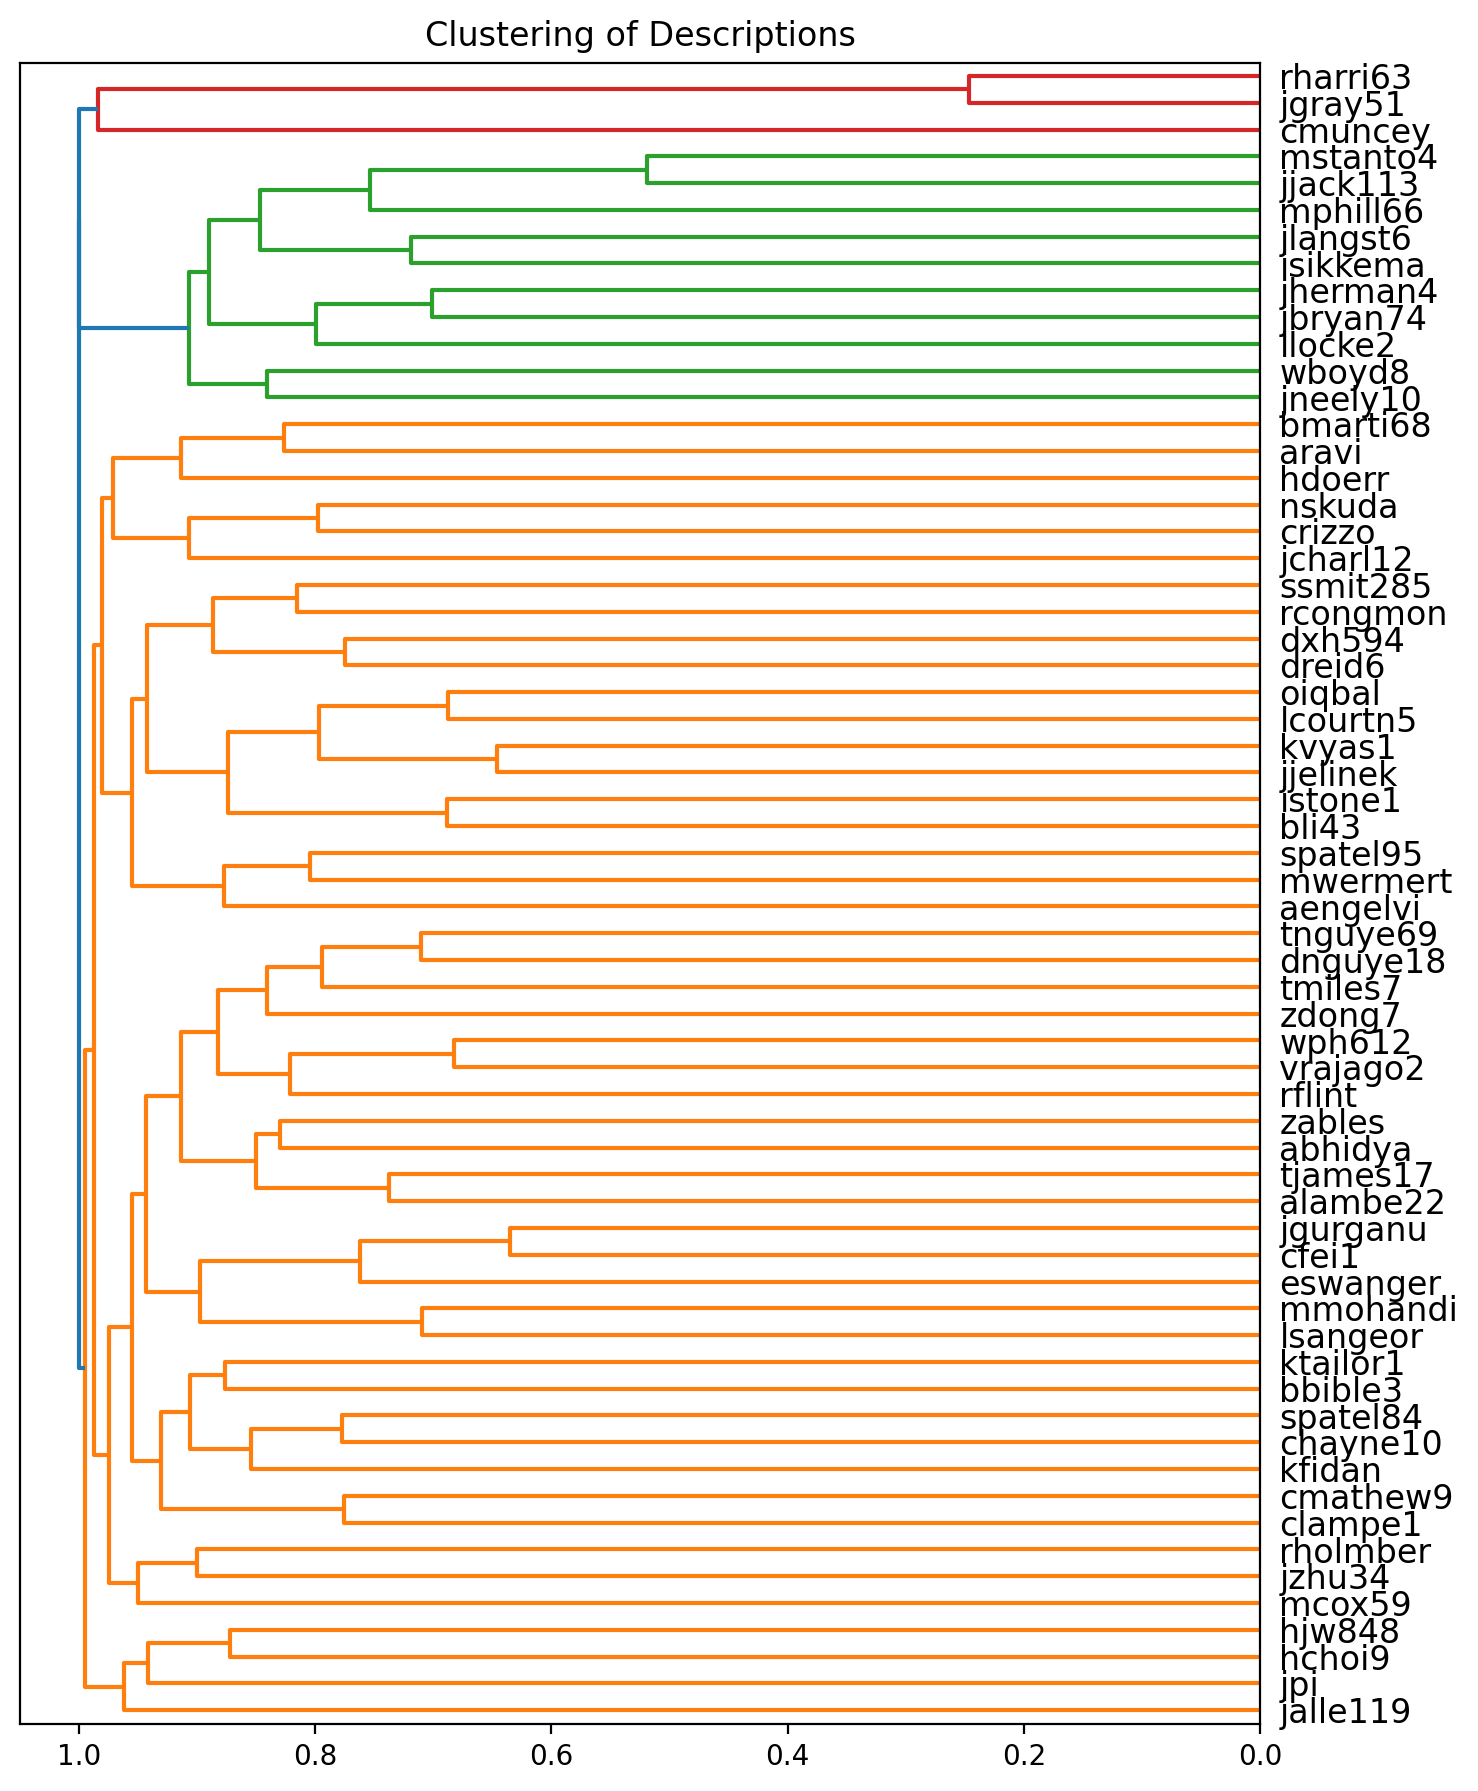

In [44]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
ij = np.where(dist1==minVal)[0][0]
for i in range(0,61):
    for j in range (i+1,60):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =12
               )
for j in range (8):
  for i in range (6):
     sys.stdout.write(flab[ddata['leaves'][61-j*6-i]]+' ')
  sys.stdout.write('\n')
for j in (0, 1):
  for i in range (7):
    sys.stdout.write(flab[ddata['leaves'][j*7+i]]+' ')
  sys.stdout.write('\n')
        
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")
